In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosistest


plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.options.display.max_columns = None

In [9]:
df = pd.read_csv("DA-promoC-Mod3-sprint1-MarinayMarta/wellness_1.csv", index_col= 0)
df.head(7)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,4,10,2,4,8,2,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,3,7,2,5,5,1,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,4,2,5,7,2,1,5,51 or more,Female,663.9
5,7/8/15,3,2,9,10,1,7,8,2,8,3,51 or more,Female,722.3
6,7/8/15,4,2,6,10,2,7,7,2,8,10,51 or more,Male,727.2


In [12]:
df_2 = df.drop(['Timestamp'], axis = 1)
df_2.head(2)


,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6


#### 1.¿Qué diferencia existe el error de tipo I y el error de tipo II?

En error de tipo 1 es aquel en el que rechazamos la hipótesis nula (H0) cuando es verdadera.

En el error de tipo II aceptamos la H0 aún siendo falsa.

En nuestro caso la H0 sería que el estilo de vida no influye en el bienestar.
La hipótesis alternativa (H1) será que el bienestar se ve influenciado por el estilo de vida. 

Aquí, un error de tipo I sería afirmar que el estilo de vida influye en el bienestar, si realmente no fuera así.
Y cometeríamos un error de tipo II al decir que el estilo de vida no influye en el bienestar, cuando realmente sí influye en él.


#### 2.¿Qué es la asimetría?

La asímetría se da cuando la distribución de los datos no es simétrica respecto a la media.

#### ¿Es simétrica vuestra variable respuesta?

In [13]:
df_2["WORK_LIFE_BALANCE_SCORE"].skew()

-0.061364527170814046

Según este resultado negativo, la variable presenta una distribución asimétrica negativa y por lo tanto no son normales

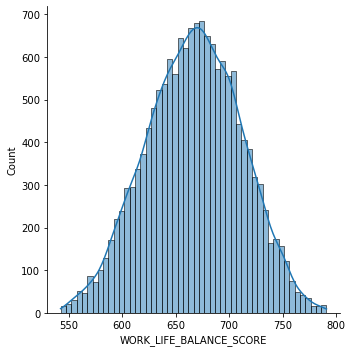

In [14]:
sns.displot(df_2["WORK_LIFE_BALANCE_SCORE"], kde = True)

Nuestro valor de skew es negativo, y aunque es un valor muy cercano a 0 lo cierto es que vendría a indicar que los datos no son normales.

No obstante en su representación gráfica vemos que los datos son bastante simétricos.

#### 4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [17]:
kurtosistest(df_2["WORK_LIFE_BALANCE_SCORE"])

KurtosistestResult(statistic=-10.823338896585083, pvalue=2.6687425283187805e-27)

Cómo el valor es negativo, la curtosis es de tipo platicútica (muy aplanada).

En este test la H0 : nuestros datos son normales, como el pvalue < 0.05 podemos rechazar la H0, lo que llevaría a aceptar que nuestros datos no son normales.

#### 5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [20]:
from scipy.stats import kstest

In [21]:
kstest(df_2["WORK_LIFE_BALANCE_SCORE"],'norm')

KstestResult(statistic=1.0, pvalue=0.0)

En este caso H0: la distribución es normal

Dado que el pvalor es < 0,05 podemos rechazar la H0 por lo que los datos no son normales.